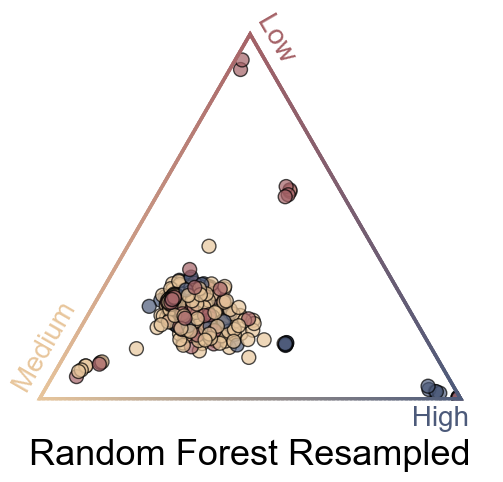

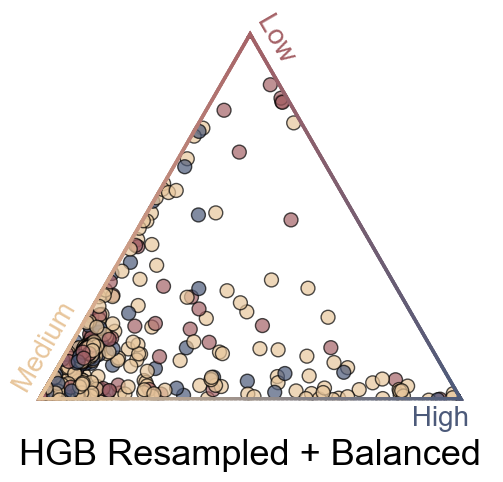

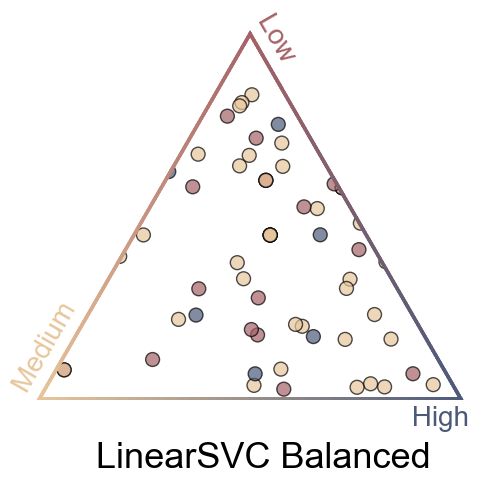

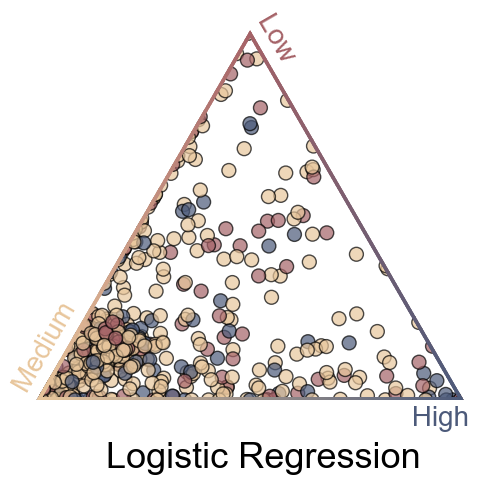

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import mpltern
import colormaps as cmaps
import matplotlib.patheffects as PathEffects
import matplotlib

def plot_triangle(m, m_name, placement=0.6):
    """
    Create a ternary plot showing model predictions for each knockout
    
    Args:
        m (str): Model name used in CSV filename
        m_name (str): Display name for the model
        placement (float): Y-coordinate for model name text
    """
    # Load prediction data
    test_data = pd.read_csv(f'fig4c_{m}.csv')
    
    # Create ternary plot
    ax = plt.subplot(projection="ternary")
    
    # Get mean scores for each knockout
    k_data = test_data.groupby('knockout_name')[['score0', 'score1', 'score2', 'true_label']].mean()

    # Define colors for each class
    red = cmaps.lipari[128].colors
    yellow = cmaps.lipari[225].colors
    blue = cmaps.lipari[60].colors
    palette = [red, yellow, blue]

    # Plot points colored by true label
    pc = ax.scatter(k_data.score0, k_data.score1, k_data.score2, 
                   c=[palette[int(label)] for label in k_data.true_label], 
                   alpha=0.7, edgecolor='black', marker='o', s=100)

    # Set axis labels
    ax.set_tlabel('Low                                                  ', color=red, fontsize=20)
    ax.set_llabel('Medium                                          ', color=yellow, fontsize=20)
    ax.set_rlabel('                                                 High', color=blue, fontsize=20)
    
    # Configure axis properties
    position = 'tick1'
    ax.taxis.set_label_position(position)
    ax.laxis.set_label_position(position)
    ax.raxis.set_label_position(position)
    
    # Remove tick labels
    ticks = []
    labels = []
    ax.taxis.set_ticks(ticks, labels=labels, fontsize=26)
    ax.laxis.set_ticks(ticks, labels=labels, fontsize=26)
    ax.raxis.set_ticks(ticks, labels=labels, fontsize=26)

    def interpolate_color(c1, c2, t):
        """Linearly interpolate between two colors"""
        return tuple((1 - t) * np.array(c1) + t * np.array(c2))

    # Draw gradient edges
    num_segments = 100  # Number of segments for smooth gradient
    lw = 5  # Line width
    
    # Draw gradient between Medium and Low
    for i in range(num_segments):
        t = i / num_segments
        color = interpolate_color(yellow, red, t)
        ax.plot([t, t + 1/num_segments], [1 - t, 1 - (t + 1/num_segments)], [0, 0], color=color, lw=lw)
    
    # Draw gradient between High and Medium  
    for i in range(num_segments):
        t = i / num_segments
        color = interpolate_color(blue, yellow, t)
        ax.plot([0, 0], [t, t + 1/num_segments], [1 - t, 1 - (t + 1/num_segments)], color=color, lw=lw)

    # Draw gradient between Low and High
    for i in range(num_segments):
        t = i / num_segments
        color = interpolate_color(red, blue, t)
        ax.plot([1 - t, 1 - (t + 1/num_segments)], [0, 0], [t, t + 1/num_segments], color=color, lw=lw)

    # Remove triangle border
    ax.spines['tside'].set_color(None)
    ax.spines['lside'].set_color(None)
    ax.spines['rside'].set_color(None)

    # Set font to Arial
    matplotlib.rcParams['font.family'] = "sans-serif"
    matplotlib.rcParams['font.sans-serif'] = "Arial"

    # Add model name text
    ax.text(-0.26, placement, 1.0, m_name, color='black', fontsize=26, ha='center', va='center')
    plt.show()

# Create plots for different models
m = 'RandomForestClassifier_Resampled'
plot_triangle(m, 'Random Forest Resampled', placement=1.0)

m = 'HistGradientBoostingClassifier_Resampled_Balanced'
plot_triangle(m, 'HGB Resampled + Balanced', placement=1.0)

m = 'LinearSVC_Balanced'
plot_triangle(m, 'LinearSVC Balanced', placement=0.9)

m = 'LogisticRegression'
plot_triangle(m, 'Logistic Regression', placement=0.9)